In [1]:
import pandas as pd
import os
import numpy as np 
import glob
import matplotlib.pyplot as plt
from data_extraction import EEGProcess
import keras

In [2]:
data = EEGProcess().extraction((2,22),(20,37),(38,60),-0.5,1.0, [1,2,3])

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:08<00:00,  1.57it/s]


In [3]:
data

,Control,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,...,F7,F8,T3,T4,T5,T6,Fz,Cz,Pz,X5
0,1,"[1.13, 0.65, -0.87, 1.41, 5.91, 3.97, 4.38, 2....","[0.12, -4.88, -3.75, -4.47, -1.97, -0.55, 0.66...","[-2.42, -3.45, -2.0, -1.26, -0.21, 0.02, -0.68...","[4.12, 4.83, 5.19, 4.03, 5.67, 5.29, 4.44, 5.2...","[-2.38, -2.77, -2.57, -2.6, -0.88, -0.37, -1.7...","[1.06, 2.48, 2.38, 2.07, 1.67, 1.43, 1.08, 1.9...","[-1.26, -2.11, -3.06, -3.79, -2.04, -1.43, -1....","[2.93, 4.02, 3.67, 2.88, 3.03, 2.6, 1.01, 1.57...","[0.84, -1.38, -3.6, -5.15, -1.38, 0.62, -0.27,...",...,"[-4.55, -7.92, -7.33, -5.86, -2.01, 1.02, -3.0...","[13.85, 14.79, 13.14, 12.64, 13.42, 13.21, 13....","[-1.51, -3.5, -2.8, -2.04, 0.29, 0.92, -1.86, ...","[5.65, 6.78, 4.58, 3.54, 4.88, 4.68, 4.12, 6.3...","[5.11, 2.7, -0.77, -0.7, 1.98, 3.27, 1.65, 3.4...","[4.65, 5.34, 3.72, 2.35, 3.47, 4.09, 2.78, 4.0...","[-0.15, 0.11, 2.21, 2.5, 4.34, 3.17, 3.49, 4.4...","[-2.97, -1.03, 0.04, -0.36, 0.9, -0.75, -1.73,...","[-0.71, -0.04, -1.08, -1.77, -0.97, -1.86, -2....","[0.26, 0.69, 0.42, 0.34, -0.06, -0.13, 0.5, 0...."
1,1,"[5.83, 7.24, 7.88, 5.76, 6.58, 5.4, 7.69, 6.77...","[-12.91, -12.83, -13.7, -13.58, -10.9, -9.57, ...","[4.58, 4.47, 5.38, 4.7, 4.6, 4.02, 4.44, 4.15,...","[-4.96, -4.75, -4.84, -4.46, -3.39, -4.58, -3....","[3.43, 2.49, 4.99, 4.68, 4.33, 3.9, 3.18, 2.97...","[-2.6, -1.72, -4.1, -4.16, -3.48, -4.11, -3.28...","[1.76, 1.71, 4.3, 4.45, 4.48, 4.33, 3.43, 2.88...","[-1.91, 0.04, -0.58, -0.75, -2.06, -3.8, -4.48...","[-0.87, 2.13, 3.45, 2.86, 1.51, -0.53, -3.9, -...",...,"[3.83, 0.23, 2.29, 1.8, 4.34, 5.82, 6.04, 5.83...","[-2.14, -4.31, -5.51, -3.77, -1.84, -3.75, -3....","[0.48, -1.49, 1.63, 0.15, 1.56, 3.64, 3.63, 4....","[-6.3, -6.45, -7.63, -8.91, -8.25, -8.51, -7.9...","[-2.99, -0.8, 4.21, 5.17, 5.35, 6.12, 4.77, 3....","[-6.86, -4.72, -5.49, -7.14, -6.78, -8.18, -8....","[-0.18, -0.51, 1.03, 0.83, 0.61, -0.49, 0.03, ...","[-0.08, -0.26, 1.22, 1.86, 0.67, -1.23, -1.26,...","[0.75, 1.68, 2.08, 2.17, 0.54, -0.29, -1.23, -...","[-0.43, 0.1, 0.36, 0.47, -0.15, -0.27, -0.64, ..."
2,1,"[-5.46, -3.83, -4.2, -11.03, -8.18, -9.85, -10...","[10.39, 10.61, 8.55, 6.25, 6.8, 13.61, 9.97, 1...","[-0.02, 0.71, 2.46, 3.95, 5.33, 3.63, 2.44, 2....","[3.59, 4.03, 3.04, 1.71, 0.74, 4.19, 3.9, 4.83...","[-1.45, -1.32, 0.02, 1.95, 2.93, 0.18, -0.48, ...","[0.01, 1.31, -0.2, -0.35, -1.9, 0.27, 2.17, 0....","[-0.41, -1.23, -1.23, 0.99, 0.61, -1.68, -2.16...","[-1.06, -0.96, -1.65, -1.35, -0.76, 0.91, 1.59...","[0.44, -2.55, -3.04, -4.9, -5.6, -5.61, -4.84,...",...,"[-10.5, -9.38, -10.25, -8.64, -5.3, -7.13, -6....","[-1.53, 0.41, -1.18, -1.43, -1.01, 2.37, 0.09,...","[-11.11, -10.76, -10.67, -7.06, -4.4, -6.89, -...","[-5.08, -4.02, -5.47, -4.53, -3.4, 0.62, -0.71...","[-6.35, -6.71, -5.34, -4.23, -5.14, -5.9, -7.2...","[-2.97, -2.69, -3.94, -4.04, -3.83, -1.39, -1....","[1.58, 2.92, 3.3, 2.84, 1.89, 3.23, 3.47, 3.27...","[1.86, 2.36, 2.87, 1.64, 2.77, 3.33, 3.38, 1.5...","[1.64, 0.99, -0.08, 1.17, 1.0, 0.59, 1.09, -0....","[0.22, -0.0, -0.46, 0.07, 0.04, -0.09, -0.16, ..."
3,1,"[3.92, 7.35, 4.16, 3.71, 0.74, -2.02, -1.94, -...","[-5.63, -5.89, -5.2, -6.88, -5.45, -7.16, -5.1...","[3.77, 3.02, 3.98, 1.77, 1.46, 0.83, -0.46, 0....","[-7.57, -7.18, -7.79, -8.24, -6.24, -6.3, -5.4...","[1.97, 1.25, 2.22, 0.48, -1.03, -1.43, -2.36, ...","[-1.86, -1.71, -2.06, -1.38, 0.18, 1.88, 1.97,...","[1.62, 0.83, 1.29, -0.32, -0.48, -1.26, -1.51,...","[-4.36, -6.16, -6.55, -5.12, -1.93, -1.7, -1.1...","[0.5, -2.2, -2.46, -2.08, -0.87, -3.09, -4.01,...",...,"[-7.12, -8.51, -8.32, -12.49, -12.68, -13.11, ...","[-5.93, -5.5, -4.83, -5.66, -4.81, -4.76, -3.6...","[4.55, 2.11, 3.72, -1.94, -3.02, -3.42, -0.44,...","[-5.99, -6.2, -5.88, -4.04, -4.47, -3.38, -2.3...","[4.1, 1.88, 2.23, -0.37, -1.99, -3.3, -3.02, -...","[-5.19, -7.12, -6.71, -4.8, -3.8, -2.95, -2.3,...","[0.59, 0.67, -0.58, -2.33, -3.22, -4.9, -5.19,...","[-4.06, -4.3, -4.12, -4.44, -4.99, -3.63, -4.6...","[-2.75, -3.8, -4.58, -4.03, -1.83, -1.87, -2.5.

In [19]:
data

,Control,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,...,F7,F8,T3,T4,T5,T6,Fz,Cz,Pz,X5
0,1,"[1.13, 0.65, -0.87, 1.41, 5.91, 3.97, 4.38, 2....","[0.12, -4.88, -3.75, -4.47, -1.97, -0.55, 0.66...","[-2.42, -3.45, -2.0, -1.26, -0.21, 0.02, -0.68...","[4.12, 4.83, 5.19, 4.03, 5.67, 5.29, 4.44, 5.2...","[-2.38, -2.77, -2.57, -2.6, -0.88, -0.37, -1.7...","[1.06, 2.48, 2.38, 2.07, 1.67, 1.43, 1.08, 1.9...","[-1.26, -2.11, -3.06, -3.79, -2.04, -1.43, -1....","[2.93, 4.02, 3.67, 2.88, 3.03, 2.6, 1.01, 1.57...","[0.84, -1.38, -3.6, -5.15, -1.38, 0.62, -0.27,...",...,"[-4.55, -7.92, -7.33, -5.86, -2.01, 1.02, -3.0...","[13.85, 14.79, 13.14, 12.64, 13.42, 13.21, 13....","[-1.51, -3.5, -2.8, -2.04, 0.29, 0.92, -1.86, ...","[5.65, 6.78, 4.58, 3.54, 4.88, 4.68, 4.12, 6.3...","[5.11, 2.7, -0.77, -0.7, 1.98, 3.27, 1.65, 3.4...","[4.65, 5.34, 3.72, 2.35, 3.47, 4.09, 2.78, 4.0...","[-0.15, 0.11, 2.21, 2.5, 4.34, 3.17, 3.49, 4.4...","[-2.97, -1.03, 0.04, -0.36, 0.9, -0.75, -1.73,...","[-0.71, -0.04, -1.08, -1.77, -0.97, -1.86, -2....","[0.26, 0.69, 0.42, 0.34, -0.06, -0.13, 0.5, 0...."
1,1,"[5.83, 7.24, 7.88, 5.76, 6.58, 5.4, 7.69, 6.77...","[-12.91, -12.83, -13.7, -13.58, -10.9, -9.57, ...","[4.58, 4.47, 5.38, 4.7, 4.6, 4.02, 4.44, 4.15,...","[-4.96, -4.75, -4.84, -4.46, -3.39, -4.58, -3....","[3.43, 2.49, 4.99, 4.68, 4.33, 3.9, 3.18, 2.97...","[-2.6, -1.72, -4.1, -4.16, -3.48, -4.11, -3.28...","[1.76, 1.71, 4.3, 4.45, 4.48, 4.33, 3.43, 2.88...","[-1.91, 0.04, -0.58, -0.75, -2.06, -3.8, -4.48...","[-0.87, 2.13, 3.45, 2.86, 1.51, -0.53, -3.9, -...",...,"[3.83, 0.23, 2.29, 1.8, 4.34, 5.82, 6.04, 5.83...","[-2.14, -4.31, -5.51, -3.77, -1.84, -3.75, -3....","[0.48, -1.49, 1.63, 0.15, 1.56, 3.64, 3.63, 4....","[-6.3, -6.45, -7.63, -8.91, -8.25, -8.51, -7.9...","[-2.99, -0.8, 4.21, 5.17, 5.35, 6.12, 4.77, 3....","[-6.86, -4.72, -5.49, -7.14, -6.78, -8.18, -8....","[-0.18, -0.51, 1.03, 0.83, 0.61, -0.49, 0.03, ...","[-0.08, -0.26, 1.22, 1.86, 0.67, -1.23, -1.26,...","[0.75, 1.68, 2.08, 2.17, 0.54, -0.29, -1.23, -...","[-0.43, 0.1, 0.36, 0.47, -0.15, -0.27, -0.64, ..."
2,1,"[-5.46, -3.83, -4.2, -11.03, -8.18, -9.85, -10...","[10.39, 10.61, 8.55, 6.25, 6.8, 13.61, 9.97, 1...","[-0.02, 0.71, 2.46, 3.95, 5.33, 3.63, 2.44, 2....","[3.59, 4.03, 3.04, 1.71, 0.74, 4.19, 3.9, 4.83...","[-1.45, -1.32, 0.02, 1.95, 2.93, 0.18, -0.48, ...","[0.01, 1.31, -0.2, -0.35, -1.9, 0.27, 2.17, 0....","[-0.41, -1.23, -1.23, 0.99, 0.61, -1.68, -2.16...","[-1.06, -0.96, -1.65, -1.35, -0.76, 0.91, 1.59...","[0.44, -2.55, -3.04, -4.9, -5.6, -5.61, -4.84,...",...,"[-10.5, -9.38, -10.25, -8.64, -5.3, -7.13, -6....","[-1.53, 0.41, -1.18, -1.43, -1.01, 2.37, 0.09,...","[-11.11, -10.76, -10.67, -7.06, -4.4, -6.89, -...","[-5.08, -4.02, -5.47, -4.53, -3.4, 0.62, -0.71...","[-6.35, -6.71, -5.34, -4.23, -5.14, -5.9, -7.2...","[-2.97, -2.69, -3.94, -4.04, -3.83, -1.39, -1....","[1.58, 2.92, 3.3, 2.84, 1.89, 3.23, 3.47, 3.27...","[1.86, 2.36, 2.87, 1.64, 2.77, 3.33, 3.38, 1.5...","[1.64, 0.99, -0.08, 1.17, 1.0, 0.59, 1.09, -0....","[0.22, -0.0, -0.46, 0.07, 0.04, -0.09, -0.16, ..."
3,1,"[3.92, 7.35, 4.16, 3.71, 0.74, -2.02, -1.94, -...","[-5.63, -5.89, -5.2, -6.88, -5.45, -7.16, -5.1...","[3.77, 3.02, 3.98, 1.77, 1.46, 0.83, -0.46, 0....","[-7.57, -7.18, -7.79, -8.24, -6.24, -6.3, -5.4...","[1.97, 1.25, 2.22, 0.48, -1.03, -1.43, -2.36, ...","[-1.86, -1.71, -2.06, -1.38, 0.18, 1.88, 1.97,...","[1.62, 0.83, 1.29, -0.32, -0.48, -1.26, -1.51,...","[-4.36, -6.16, -6.55, -5.12, -1.93, -1.7, -1.1...","[0.5, -2.2, -2.46, -2.08, -0.87, -3.09, -4.01,...",...,"[-7.12, -8.51, -8.32, -12.49, -12.68, -13.11, ...","[-5.93, -5.5, -4.83, -5.66, -4.81, -4.76, -3.6...","[4.55, 2.11, 3.72, -1.94, -3.02, -3.42, -0.44,...","[-5.99, -6.2, -5.88, -4.04, -4.47, -3.38, -2.3...","[4.1, 1.88, 2.23, -0.37, -1.99, -3.3, -3.02, -...","[-5.19, -7.12, -6.71, -4.8, -3.8, -2.95, -2.3,...","[0.59, 0.67, -0.58, -2.33, -3.22, -4.9, -5.19,...","[-4.06, -4.3, -4.12, -4.44, -4.99, -3.63, -4.6...","[-2.75, -3.8, -4.58, -4.03, -1.83, -1.87, -2.5.

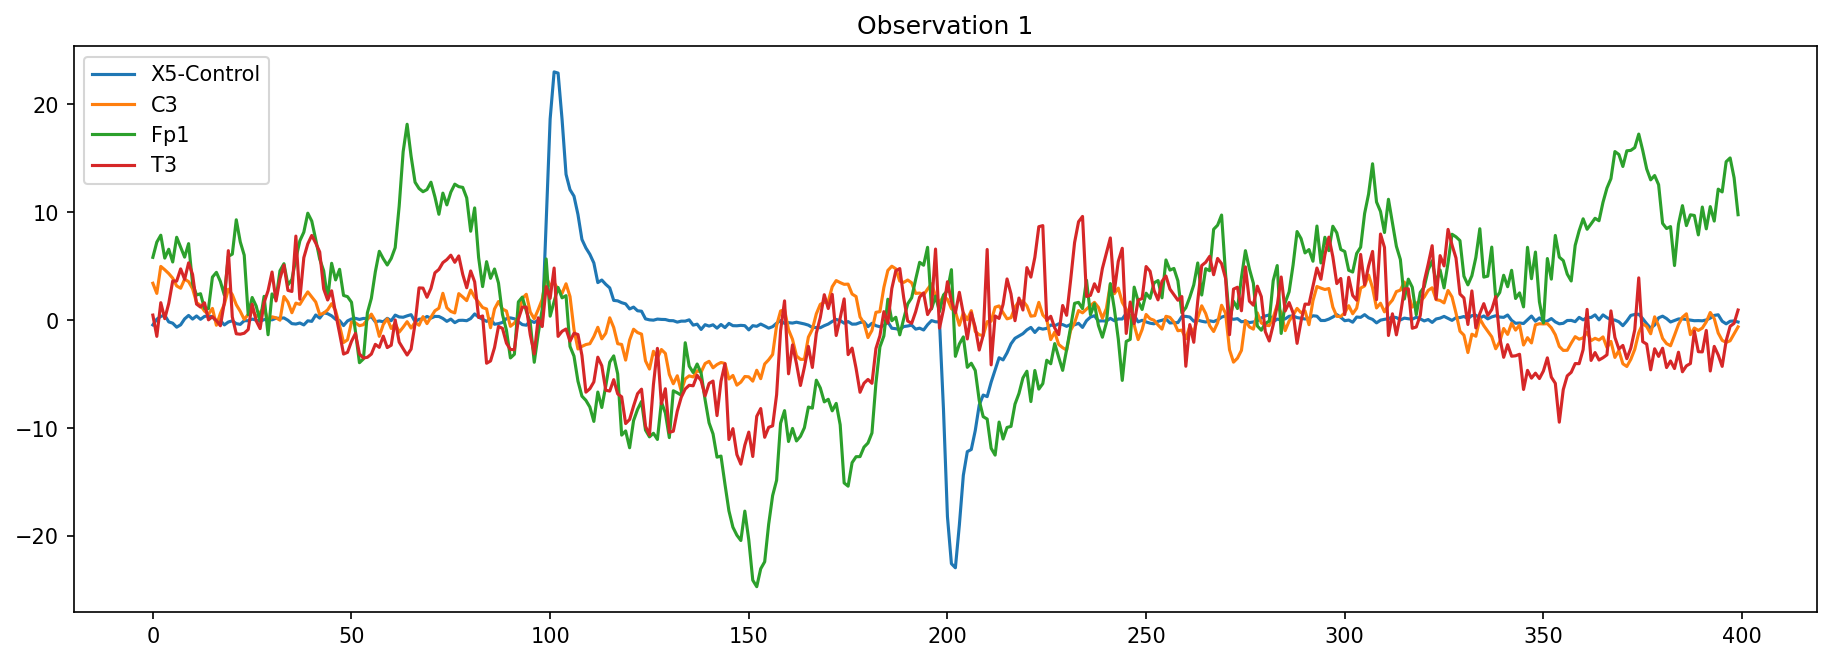

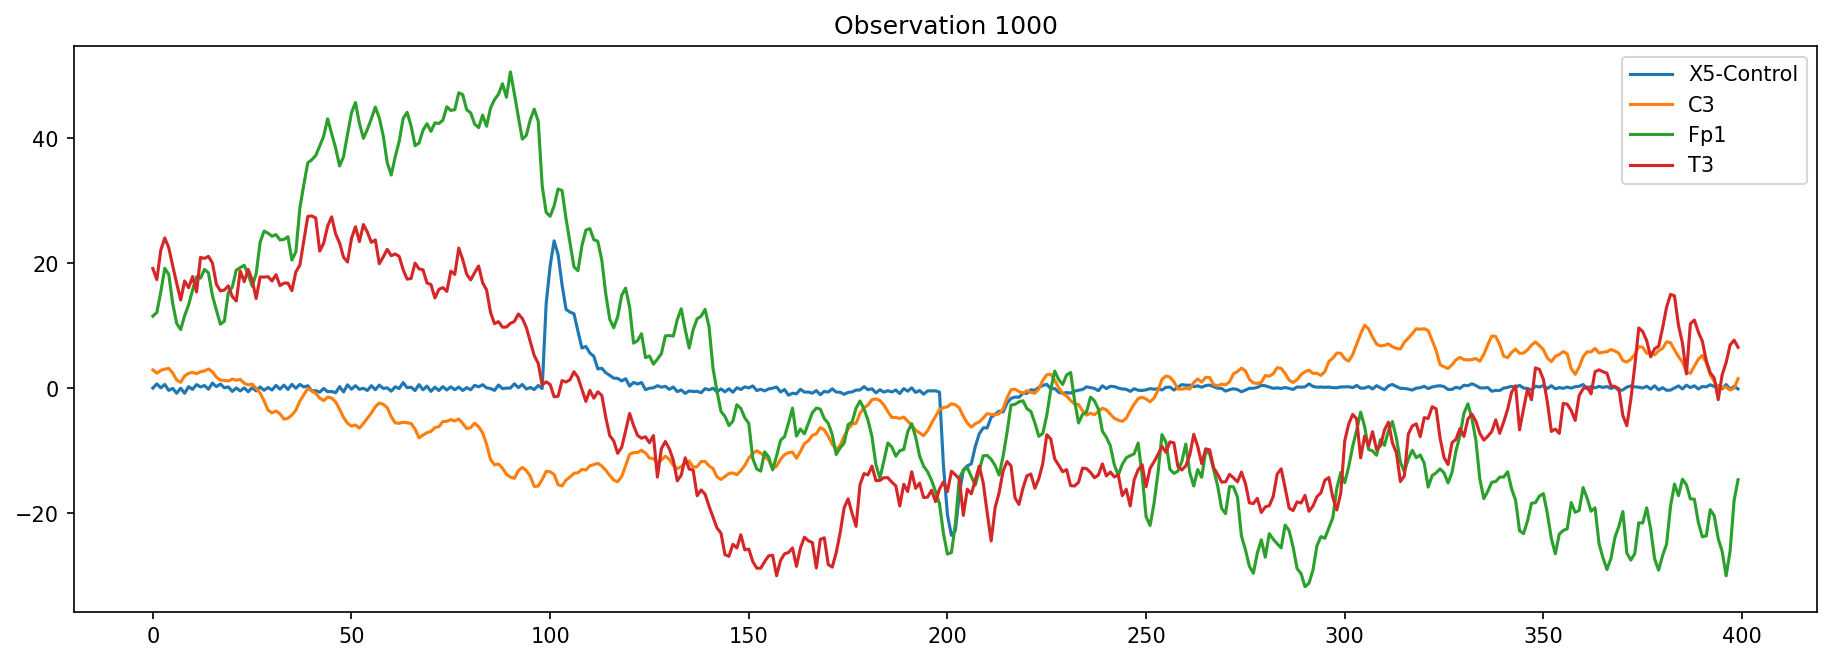

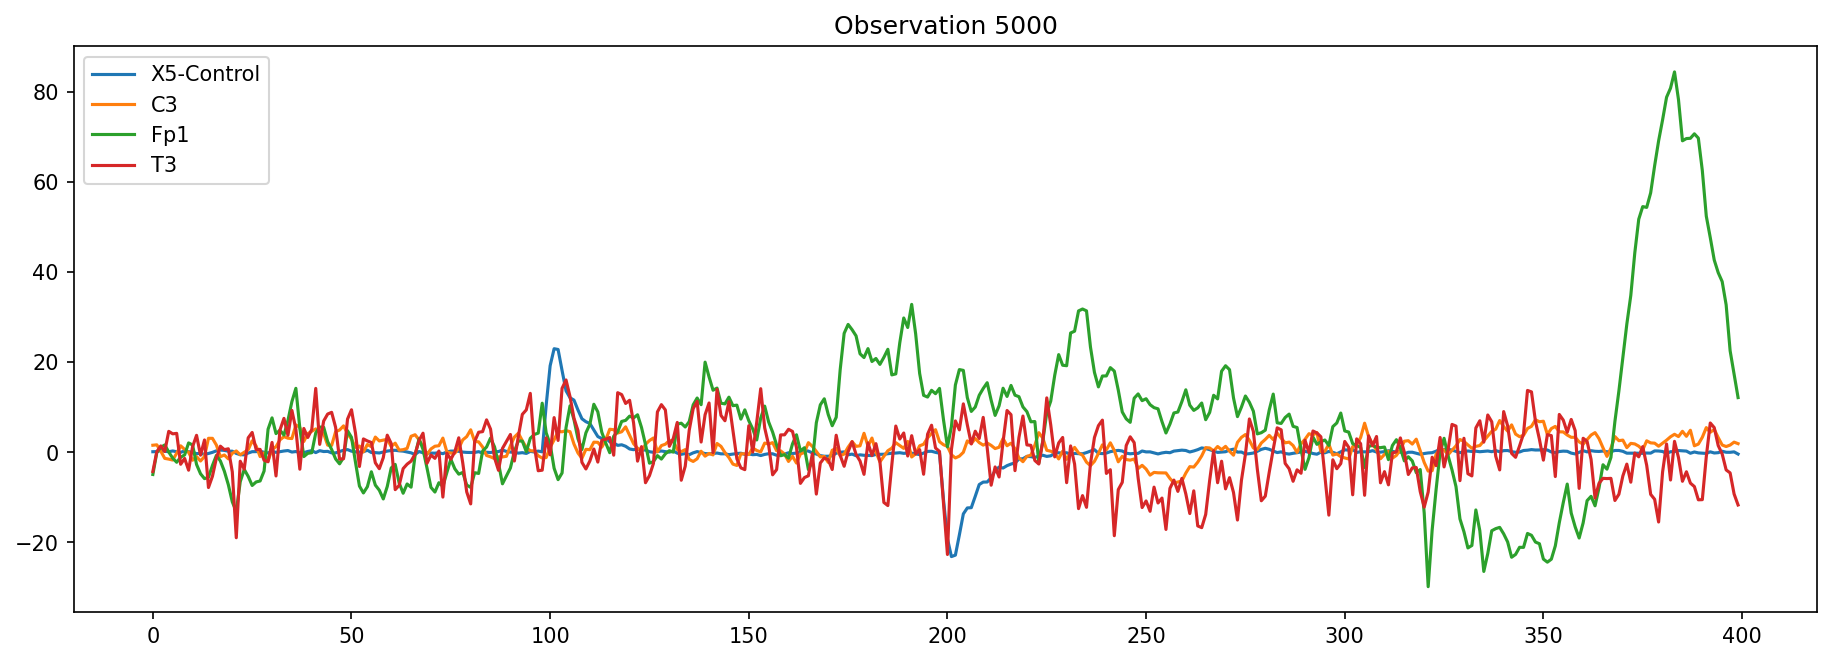

In [4]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['figure.dpi'] = (150)
for i in [1,1000,5000]:
    plt.plot(data['X5'][i],label='X5-Control')
    plt.plot(data['C3'][i],label='C3')
    plt.plot(data['Fp1'][i],label='Fp1')
    plt.plot(data['T3'][i],label='T3')
    plt.title(f'Observation {i}')
    plt.legend()
    plt.show()

In [20]:
X = data.drop(columns=['Control','X5'])
y = data.Control

In [21]:
X_copy = X.copy()
for key in X.columns:
    X_copy[key] = X[key].apply(lambda x: len(x))
# X_copy.drop(X_copy[X_copy['O1']!=400].index, inplace=True)

In [22]:
X_copy.shape

(13613, 21)

In [23]:
X_copy

,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,...,A2,F7,F8,T3,T4,T5,T6,Fz,Cz,Pz
0,300,300,300,300,300,300,300,300,300,300,...,300,300,300,300,300,300,300,300,300,300
1,300,300,300,300,300,300,300,300,300,300,...,300,300,300,300,300,300,300,300,300,300
2,300,300,300,300,300,300,300,300,300,300,...,300,300,300,300,300,300,300,300,300,300
3,300,300,300,300,300,300,300,300,300,300,...,300,300,300,300,300,300,300,300,300,300
4,300,300,300,300,300,300,300,300,300,300,...,300,300,300,300,300,300,300,300,300,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13608,300,300,300,300,300,300,300,300,300,300,...,300,300,300,300,300,300,300,300,300,300
13609,300,300,300,300,300,300,300,300,300,300,...,300,300,300,300,300,300,300,300,300,300
13610,300,300,300,300,300,300,300,300,300,300,...,300,300,300,300,300,300,300,300,300,300
13611,300,300,300,300,300,300,300,300,300,300,...,300,300,300,300,300,300,300,300,300,300


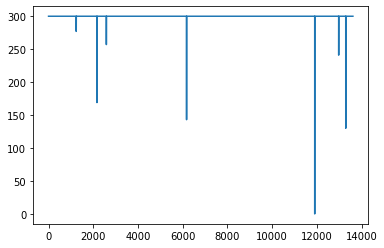

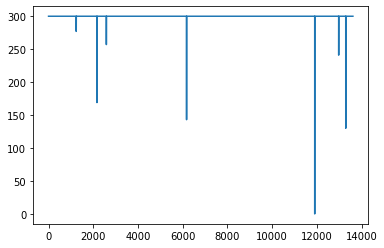

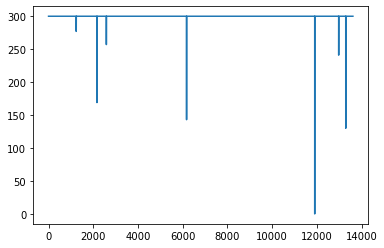

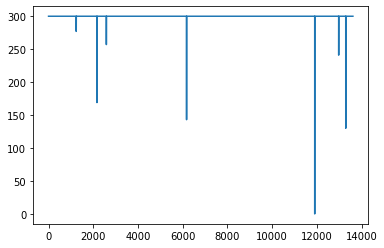

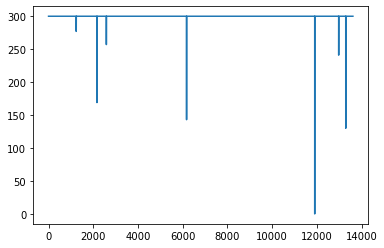

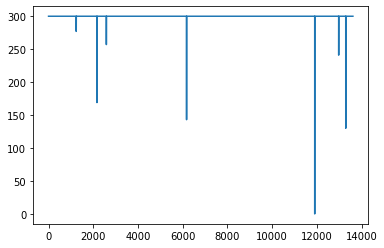

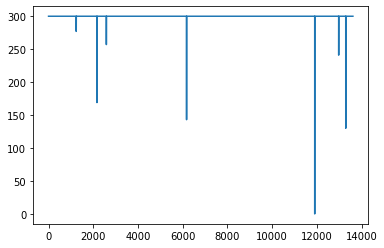

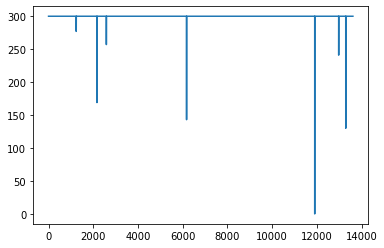

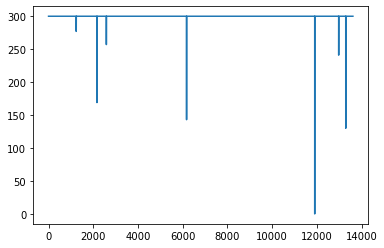

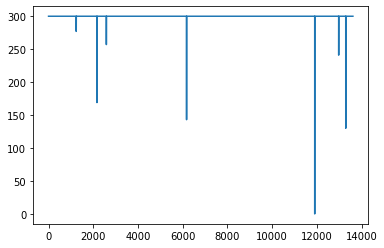

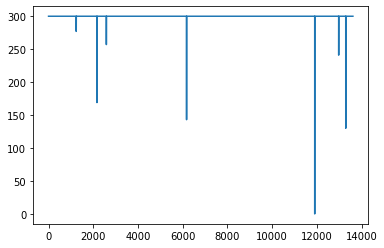

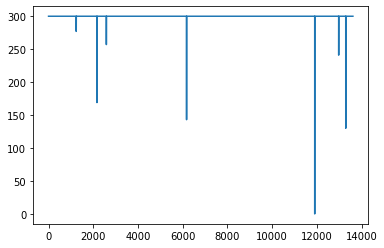

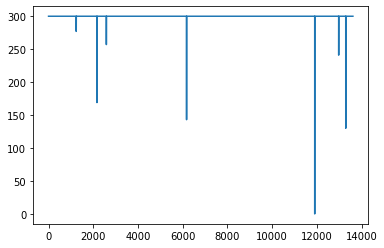

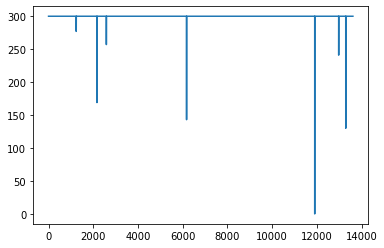

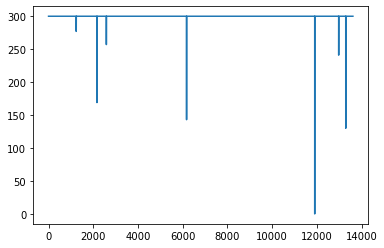

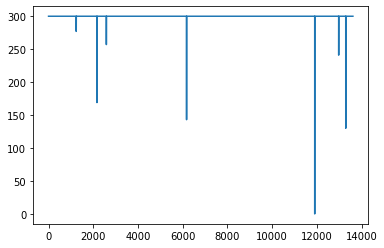

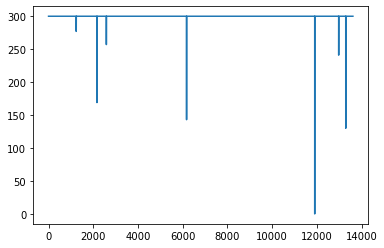

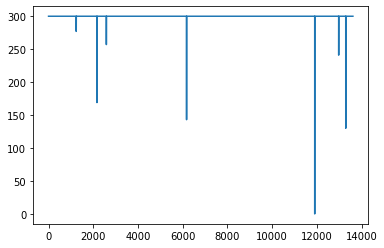

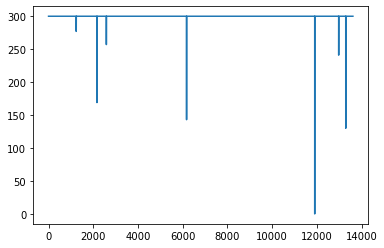

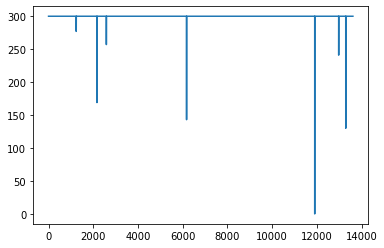

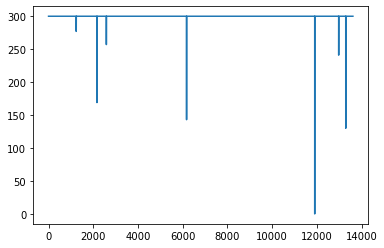

In [24]:
for key in X.columns:
    plt.plot(X_copy[key])
    plt.show()

In [25]:
X_copy.describe()

,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,...,A2,F7,F8,T3,T4,T5,T6,Fz,Cz,Pz
count,13613.000000,13613.000000,13613.000000,13613.000000,13613.000000,13613.000000,13613.000000,13613.000000,13613.000000,13613.000000,...,13613.000000,13613.000000,13613.000000,13613.000000,13613.000000,13613.000000,13613.000000,13613.000000,13613.000000,13613.000000
mean,299.935136,299.935136,299.935136,299.935136,299.935136,299.935136,299.935136,299.935136,299.935136,299.935136,...,299.935136,299.935136,299.935136,299.935136,299.935136,299.935136,299.935136,299.935136,299.935136,299.935136
std,3.497530,3.497530,3.497530,3.497530,3.497530,3.497530,3.497530,3.497530,3.497530,3.497530,...,3.497530,3.497530,3.497530,3.497530,3.497530,3.497530,3.497530,3.497530,3.497530,3.497530
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
50%,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
75%,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
max,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000


In [9]:
X.drop(X_copy[X_copy['O1']!=400].index, inplace=True)
y.drop(X_copy[X_copy['O1']!=400].index, inplace=True)

In [10]:
X.shape

(13603, 21)

In [11]:
X_copy = X.copy()
for key in X.columns:
    X_copy[key] = X[key].apply(lambda x: len(x))

In [12]:
X_copy.describe()

,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,...,A2,F7,F8,T3,T4,T5,T6,Fz,Cz,Pz
count,13603.0,13603.0,13603.0,13603.0,13603.0,13603.0,13603.0,13603.0,13603.0,13603.0,...,13603.0,13603.0,13603.0,13603.0,13603.0,13603.0,13603.0,13603.0,13603.0,13603.0
mean,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,...,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,...,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
25%,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,...,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
50%,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,...,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
75%,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,...,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
max,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,...,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0


In [8]:
['a','b'] + ['c','d']

['a', 'b', 'c', 'd']

In [10]:
X_fil = X[['C3']+['C4']]

In [15]:
X.values.shape[0]

13613

In [15]:
df_mat = np.zeros([13603,21,400])
from tqdm import tqdm
for i in tqdm(range(13603)):
    for j in range(21):
        for k in range(400):
            df_mat[i][j][k] =  X.values[i][j][k]

100%|████████████████████████████████████████████████████████████████████████████| 13603/13603 [05:04<00:00, 44.60it/s]


In [16]:
df_mat_fil = np.zeros([13603,1,400])
from tqdm import tqdm
for i in tqdm(range(13603)):
    for j in range(1):
        for k in range(400):
            df_mat_fil[i][j][k] =  X_fil.values[i][k]

100%|██████████████████████████████████████████████████████████████████████████| 13603/13603 [00:05<00:00, 2633.18it/s]


In [17]:
df_mat_fil.shape

(13603, 1, 400)

In [18]:
df_mat.shape

(13603, 21, 400)

In [19]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

In [20]:
y.to_numpy().reshape(13603,-1)

array([[1],
       [1],
       [1],
       ...,
       [3],
       [3],
       [3]], dtype=int64)

In [21]:
OHE = OneHotEncoder()
OHE.fit(y.to_numpy().reshape(13603,-1))

OneHotEncoder()

In [22]:
y_t = OHE.transform(y.to_numpy().reshape(13603,-1)).toarray()

In [23]:
y_t

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [24]:
y_t.shape

(13603, 3)

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LSTM, BatchNormalization,Activation

In [26]:
from tensorflow.python.client import device_lib

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
device_lib.list_local_devices()

Num GPUs Available:  1


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16872274345330722397
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5762973696
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 11468507147571219102
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [27]:
from sklearn.model_selection import train_test_split

In [52]:
# X_train,X_test,y_train,y_test = train_test_split(df_mat,y_t,test_size=0.3, stratify=y_t, random_state=42)

# y_res = y.to_numpy().reshape(13603,-1)
y_res = tf.keras.utils.to_categorical(y-1)
X_train,X_test,y_train,y_test = train_test_split(df_mat,y_res,test_size=0.3, stratify=y_res, random_state=42)

# X_train,X_test,y_train,y_test = train_test_split(df_mat_fil,y.values,test_size=0.3, stratify=y.values, random_state=42)
# X_train,X_test,y_train,y_test = train_test_split(df_mat_fil,y_res,test_size=0.3, stratify=y_res, random_state=42)

In [53]:
print(f'X train shape: {X_train.shape}')
print(f'y train shape: {y_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y test shape: {y_test.shape}')


X train shape: (9522, 21, 400)
y train shape: (9522, 3)
X test shape: (4081, 21, 400)
y test shape: (4081, 3)


In [54]:
y_train

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

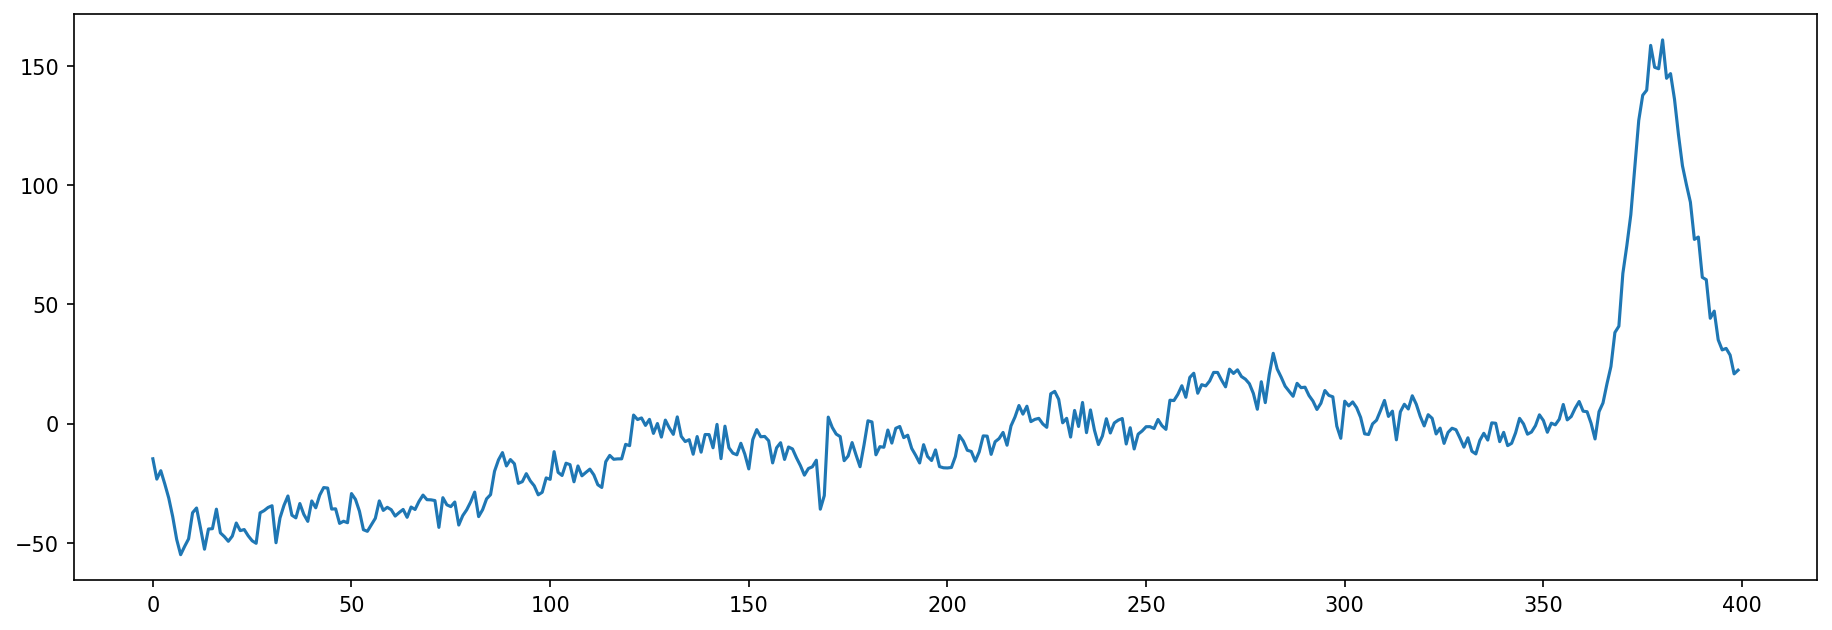

In [55]:
#Before Scaling
plt.plot(X_train[0,0])

In [56]:
scalers = {}
for i in range(X_train.shape[1]):
    scalers[i] = StandardScaler()
    X_train[:, i, :] = scalers[i].fit_transform(X_train[:, i, :]) 

for i in range(X_test.shape[1]):
    X_test[:, i, :] = scalers[i].transform(X_test[:, i, :])

In [57]:
X_train[:,0,:]

array([[-0.52460907, -0.90578915, -0.75323726, ...,  0.38546345,
         0.2210565 ,  0.27703352],
       [-0.01029652, -0.09460903, -0.21041218, ...,  2.6905027 ,
         2.84206344,  2.94054723],
       [-0.08707261, -0.04097002, -0.08180166, ..., -0.11680191,
        -0.09246887, -0.03319388],
       ...,
       [ 0.53062592,  0.41012527,  0.30890822, ..., -0.08897493,
        -0.05548776, -0.084229  ],
       [ 0.77273233,  0.78779666,  0.78033229, ...,  1.23568096,
         1.0309195 ,  0.90245008],
       [-0.85308859, -0.86665905, -0.82729918, ...,  0.37741433,
         0.33758188,  0.27986881]])

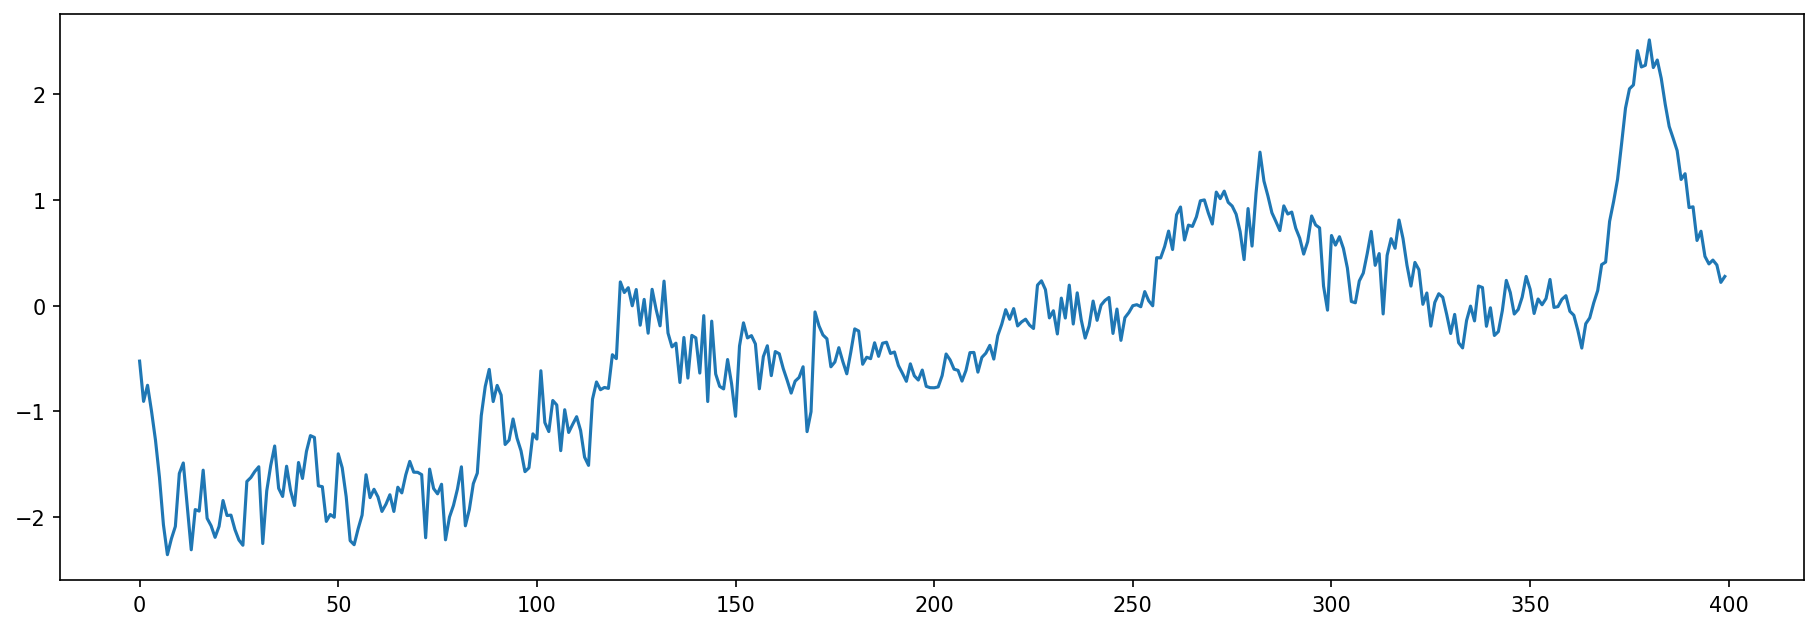

In [58]:
#After Scaling
plt.plot(X_train[0,0])

In [59]:
X_train.shape[1:]

(21, 400)

In [116]:
def architecture (input_shape, num_classes,activation, dropout,batch_normalization,dropout_rate):
    model = Sequential()
    
    #LSTM layers
    # model.add(LSTM(400, input_shape= X_train.shape[1:], return_sequences = False))
    # model.add(Dropout(0.2))
    # for _ in range(20):
    #     model.add(LSTM(400, activation='tanh', return_sequences=True))
    #     model.add(Dropout(0.1))

    #Dense
    model.add(tf.keras.layers.Flatten(input_shape=(X_train.shape[1:])))
    model.add(Dense(100,kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))
    if batch_normalization:
        model.add(BatchNormalization())
    if dropout:
        model.add(Dropout(dropout_rate))
    model.add(Dense(100, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation('tanh'))
    if batch_normalization:
        model.add(BatchNormalization())
    if dropout:
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(num_classes,kernel_regularizer=keras.regularizers.l2(l=0.01)))
    model.add(Activation('softmax',name='CNN_EEGModel'))
    return model

In [117]:
one_image = (21, 400)
activation='sigmoid'
num_classes=3
dropout=True
batch_normalization=True

model = architecture(one_image,num_classes,activation,dropout,batch_normalization,dropout_rate=0.2)

In [118]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 8400)              0         
                                                                 
 dense_18 (Dense)            (None, 100)               840100    
                                                                 
 activation_12 (Activation)  (None, 100)               0         
                                                                 
 batch_normalization_6 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 100)               10100     
                                                      

In [119]:
# opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)

C:\Users\Andrew S\AppData\Roaming\Python\Python38\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [120]:
model.compile(loss='categorical_crossentropy',optimizer=opt,
             metrics=['accuracy'])
num_epochs = 10
validation_portion = 0.3
history = model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs = num_epochs, batch_size = 64, \
                            validation_split = validation_portion, shuffle=True, verbose=1)

Epoch 1/10
105/105 [==============================] - 1s 6ms/step - loss: 1.0302 - accuracy: 0.5428 - val_loss: 0.8725 - val_accuracy: 0.6027
Epoch 2/10
105/105 [==============================] - 1s 5ms/step - loss: 0.7859 - accuracy: 0.6563 - val_loss: 0.7919 - val_accuracy: 0.6549
Epoch 3/10
105/105 [==============================] - 0s 5ms/step - loss: 0.7064 - accuracy: 0.7005 - val_loss: 0.7727 - val_accuracy: 0.6675
Epoch 4/10
105/105 [==============================] - 0s 5ms/step - loss: 0.6365 - accuracy: 0.7314 - val_loss: 0.7445 - val_accuracy: 0.6741
Epoch 5/10
105/105 [==============================] - 0s 5ms/step - loss: 0.5976 - accuracy: 0.7524 - val_loss: 0.7832 - val_accuracy: 0.6745
Epoch 6/10
105/105 [==============================] - 1s 5ms/step - loss: 0.5566 - accuracy: 0.7743 - val_loss: 0.7658 - val_accuracy: 0.6867
Epoch 7/10
105/105 [==============================] - 1s 5ms/step - loss: 0.5310 - accuracy: 0.7821 - val_loss: 0.7725 - val_accuracy: 0.6843
Epoch 

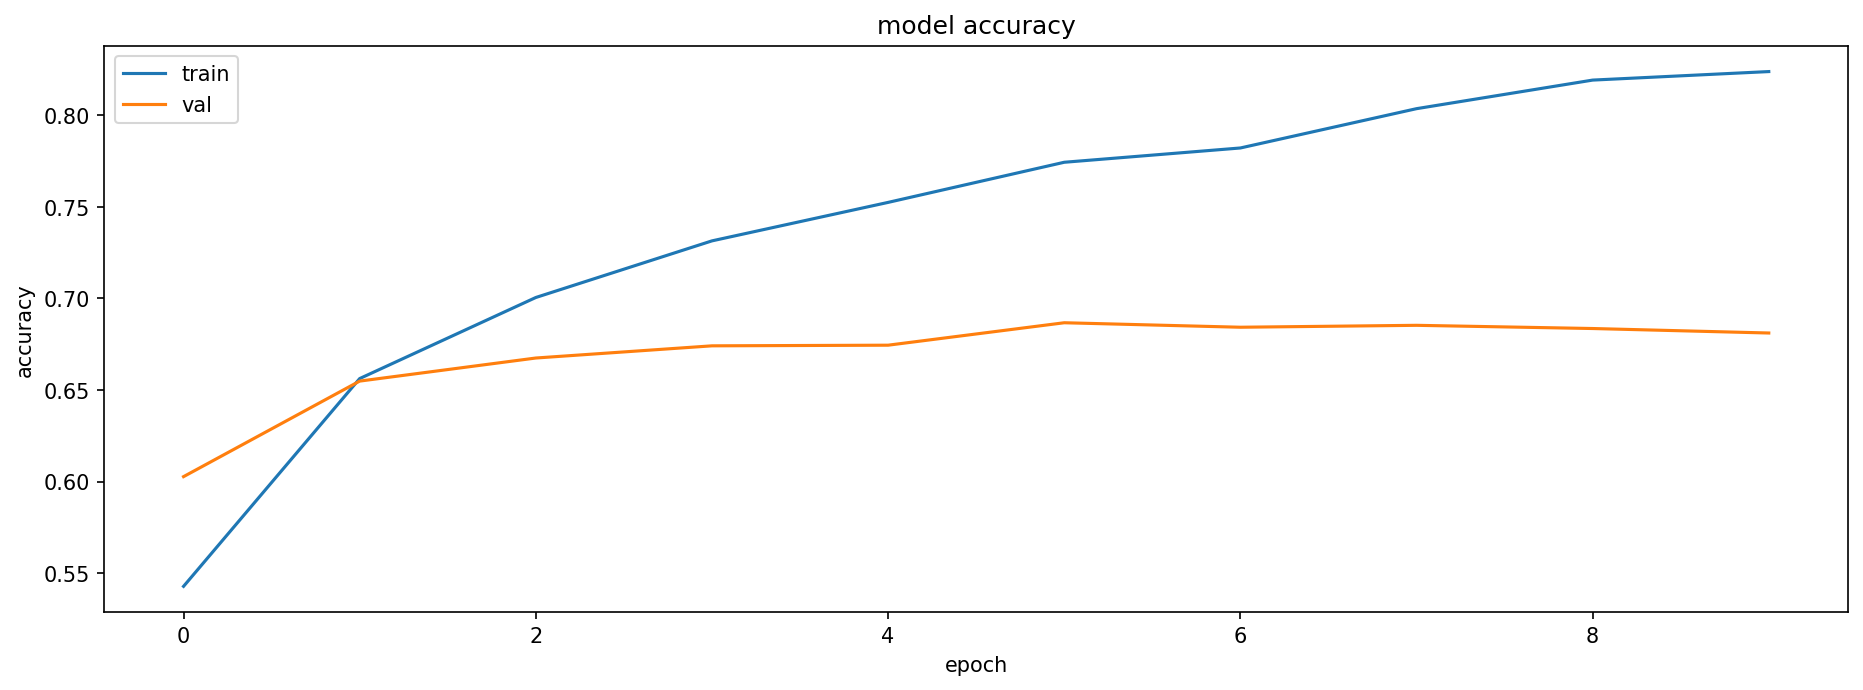

In [121]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

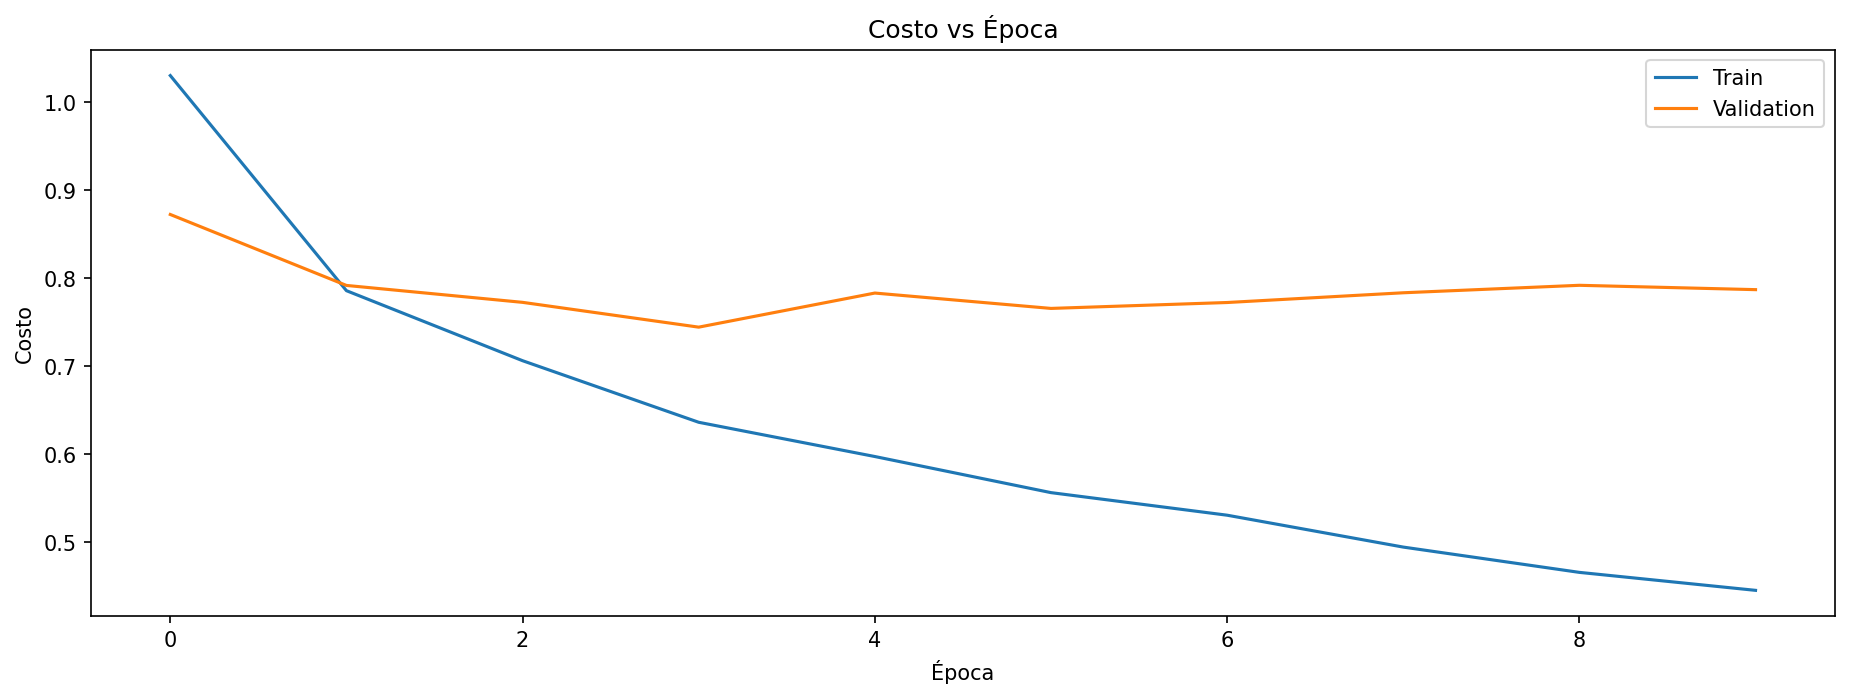

In [126]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Costo vs Época')
#plt.xlim(0,50)
plt.ylabel('Costo')
plt.xlabel('Época')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig("CvsE.png")
plt.show()

In [124]:
model.predict(np.expand_dims(X_test[0],axis=0))

array([[0.2171662 , 0.4401634 , 0.34267035]], dtype=float32)

In [125]:
y_test[0]

array([1., 0., 0.], dtype=float32)

In [127]:
loss,accuracy = model.evaluate(X_test,y_test,batch_size = 32,verbose = 1)
print("Test fraction correct (Accuracy) = {:.2f}".format(accuracy))

128/128 [==============================] - 0s 2ms/step - loss: 0.7339 - accuracy: 0.7104
Test fraction correct (Accuracy) = 0.71


In [129]:
res=model.predict(X_test)

In [142]:
y_pred = np.argmax(res, axis=1)
y_test_arg = np.argmax(y_test, axis=1)

In [141]:
y_pred

array([1, 1, 1, ..., 2, 2, 0], dtype=int64)

In [144]:
y_test_arg

array([0, 1, 1, ..., 2, 2, 1], dtype=int64)

In [147]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_arg, y_pred , normalize='pred')

In [148]:
print(cm)

[[0.7341482  0.16482759 0.1633888 ]
 [0.13216196 0.71103448 0.1505295 ]
 [0.13368984 0.12413793 0.68608169]]


In [158]:
import itertools
def plot_confusion_matrix(model,X_test,y_test,type_cm,display_labels,cmap=plt.cm.Blues,normalize=True):
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    y_test = np.argmax(y_test, axis=1)
    c_mat = confusion_matrix(y_test,y_pred)
    if normalize:
        c_mat = np.round(c_mat.astype('float') / c_mat.sum(axis=1)[:, np.newaxis],4)
    plt.imshow(c_mat, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix'+type_cm)
    plt.colorbar()
    tick_marks = np.arange(len(display_labels))
    plt.xticks(tick_marks, display_labels, rotation=0)
    plt.yticks(tick_marks, display_labels)
    thresh = c_mat.max() / 2.
    for i, j in itertools.product(range(c_mat.shape[0]), range(c_mat.shape[1])):
        plt.text(j, i, c_mat[i, j],
                 horizontalalignment="center",
                 color="white" if c_mat[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def disp_confusion_matrix(model,X,y,type_cm,class_label):
    disp = plot_confusion_matrix(model, X, y, type_cm,display_labels=class_label,
                                 cmap=plt.cm.Blues)

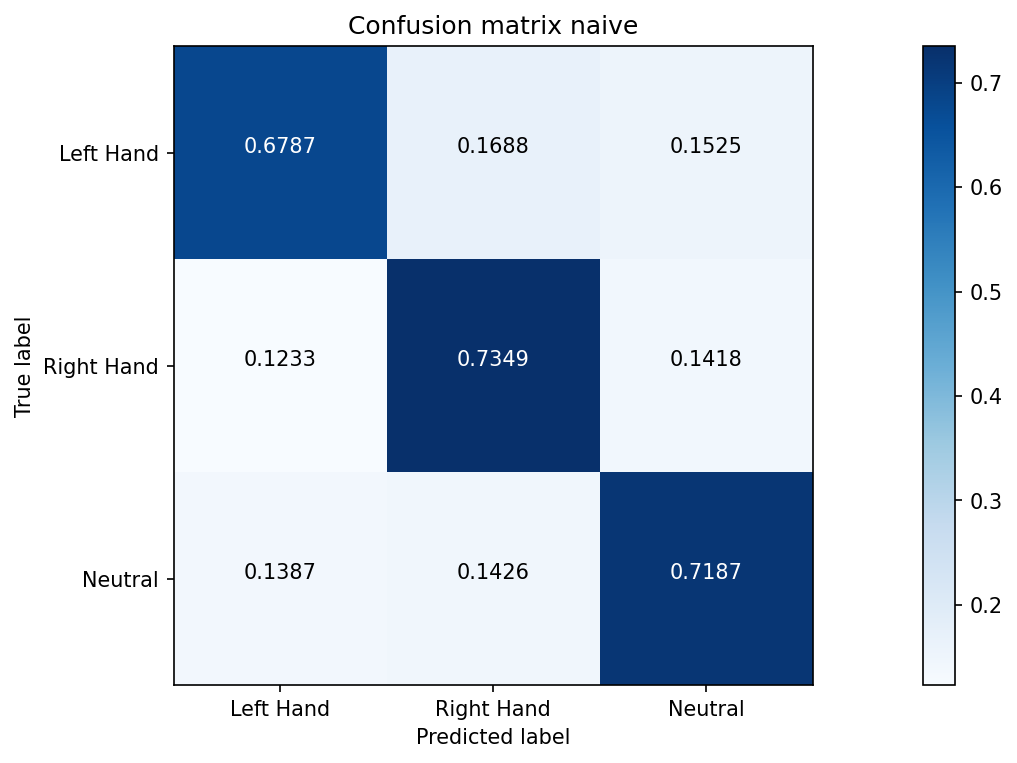

In [160]:
disp_confusion_matrix(model,X_test,y_test,' naive',class_label=['Left Hand','Right Hand','Neutral'])